# Geospatial Mapping of Global CO2 emissions


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> This workshop session requires you to use the datasets, World_CO2.csv (world CO2 emission), and World_Pop.csv (world total population). 
     
 <span style='font-family:Georgia'> Answer the following questions using the above datasets (World_CO2.csv and World_Pop.csv ). For plotting purposes, you should use choropleth maps wherever appropriate.
 
</div>

### Preparing the data

In [227]:
# importing the basic packages needed for the project
import geopandas as gpd # to create and plot geodataframes
import pandas as pd # to read csv,  clean, filter and processes it
import matplotlib.pyplot as plt # to plot the maps
import seaborn as sns # to plot heatmaps and other plots
import plotly.express as px # for having interactive plots

In [162]:
dfCO2 = pd.read_csv("World_CO2.csv", header=2) # creating a dataframe
dfCO2.head() # reading the first five rows

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,11092.675,11576.719,12713.489,12178.107,11840.743,10623.299,...,1349.456,861.745,872.746,898.415,883.747,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,...,10755.311,9050.156,8467.103,9035.488,8672.455,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,34176.440,33692.396,44851.077,34583.477,34693.487,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,...,4924.781,4913.780,5489.499,4616.753,4536.079,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,487.711,476.710,462.042,465.709,469.376,NaN,NaN,NaN,NaN,NaN


In [163]:
dfPop = pd.read_csv("World_Pop.csv", header=2) # creating a dataframe
dfPop.head() # reading the first five rows

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN


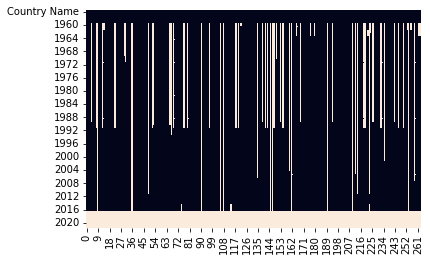

In [164]:
# visualizing null values before cleaning...
sns.heatmap(dfCO2.isna().T, cbar=False) # visualizing the null values for the dataset using a heatmap
# each white pixel represents a null value!

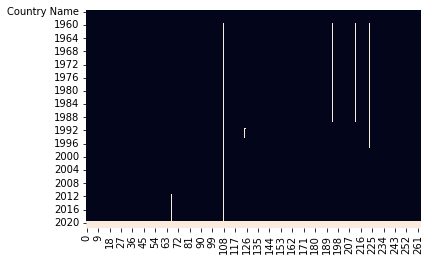

In [165]:
# visualizing null values before cleaning...
sns.heatmap(dfPop.isna().T, cbar=False) # visualizing the null values for the dataset using a heatmap
# each white pixel represents a null value!

In [166]:
dfCO2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [167]:
# since we need the country from 2015
dfCO2 = dfCO2[["Country Code", '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015']]
dfCO2.head()

,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ABW,707.731,726.066,759.069,806.740,810.407,2379.883,2409.219,2438.555,2563.233,...,2717.247,2823.590,2658.575,2629.239,2508.228,2500.894,1349.456,861.745,872.746,898.415
1,AFG,1243.113,1177.107,1096.433,1041.428,821.408,773.737,817.741,1070.764,1213.777,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
2,AGO,10975.331,10458.284,7381.671,7308.331,9156.499,9541.534,9732.218,12665.818,9064.824,...,22266.024,25151.953,25709.337,27792.193,29057.308,30586.447,34176.440,33692.396,44851.077,34583.477
3,ALB,2086.523,2016.850,1543.807,1752.826,2984.938,3021.608,3223.293,3751.341,4294.057,...,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4924.781,4913.780,5489.499,4616.753
4,AND,425.372,454.708,465.709,491.378,513.380,524.381,524.381,531.715,535.382,...,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.710,462.042,465.709


In [168]:
# since we need the country from 2015
dfPop = dfPop[["Country Code", '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015']]
dfPop.head()

,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ABW,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,...,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0
1,AFG,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,...,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0
2,AGO,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,...,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0
3,ALB,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0
4,AND,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,...,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0


In [169]:
null_counts = dfCO2.isnull().sum() # checking for null values
null_counts[null_counts > 0] # sum of null values per feature or column

1995    19
1996    19
1997    19
1998    19
1999    19
2000    19
2001    19
2002    18
2003    18
2004    18
2005    17
2006    16
2007    15
2008    14
2009    14
2010    14
2011    14
2012    11
2013    11
2014    11
2015    14
dtype: int64

In [170]:
null_counts = dfPop.isnull().sum() # checking for null values
null_counts[null_counts > 0] # sum of null values per feature or column

1995    2
1996    2
1997    2
1998    1
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
2012    2
2013    2
2014    2
2015    2
dtype: int64

In [171]:
df_master = dfCO2.merge(dfPop, on="Country Code") # merging the dfCO2 and dfPop
df_merged = df_master[["Country Code", "2015_x", "2015_y"]]
df_merged.head()

,Country Code,2015_x,2015_y
0,ABW,898.415,104341.0
1,AFG,9035.488,34413603.0
2,AGO,34583.477,27884381.0
3,ALB,4616.753,2880703.0
4,AND,465.709,78011.0


In [172]:
null_counts = df_merged.isnull().sum() # checking for null values
null_counts[null_counts > 0] # sum of null values per feature or column

2015_x    14
2015_y     2
dtype: int64

In [173]:
df_merged = df_merged.fillna(0) # for null values of population and co2 emmission we fill 0

In [174]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # reading the naturalearth_lowres in built dataset
world = world[["iso_a3", "geometry", "name"]] # only selecting the required columns
world.rename(columns = {'iso_a3':'Country Code'}, inplace = True) # renaming the column iso_a3 to join with dfOne
world.head() # checking the head

,Country Code,geometry,name
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America


In [175]:
df_merged = world.merge(df_merged, on="Country Code") # merging the dfmerged and world
df_master = world.merge(df_master, on="Country Code") # merging the df_master and world
df_merged.head()

,Country Code,geometry,name,2015_x,2015_y
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2156.196,868627.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,12933.509,51482633.0
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,549430.277,35702908.0
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,5126913.374,320635163.0
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,242091.673,17542806.0


### Activity

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> Question 1: For year 2015, plot the CO2 emissions for only the countries having population greater than 300000000. Very briefly interpret the generated plot.
</div>

,Country Code,geometry,name,2015_x,2015_y
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,5.126913e+06,3.206352e+08
93,IND,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",India,2.337749e+06,1.310152e+09
134,CHN,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",China,1.014500e+07,1.371220e+09


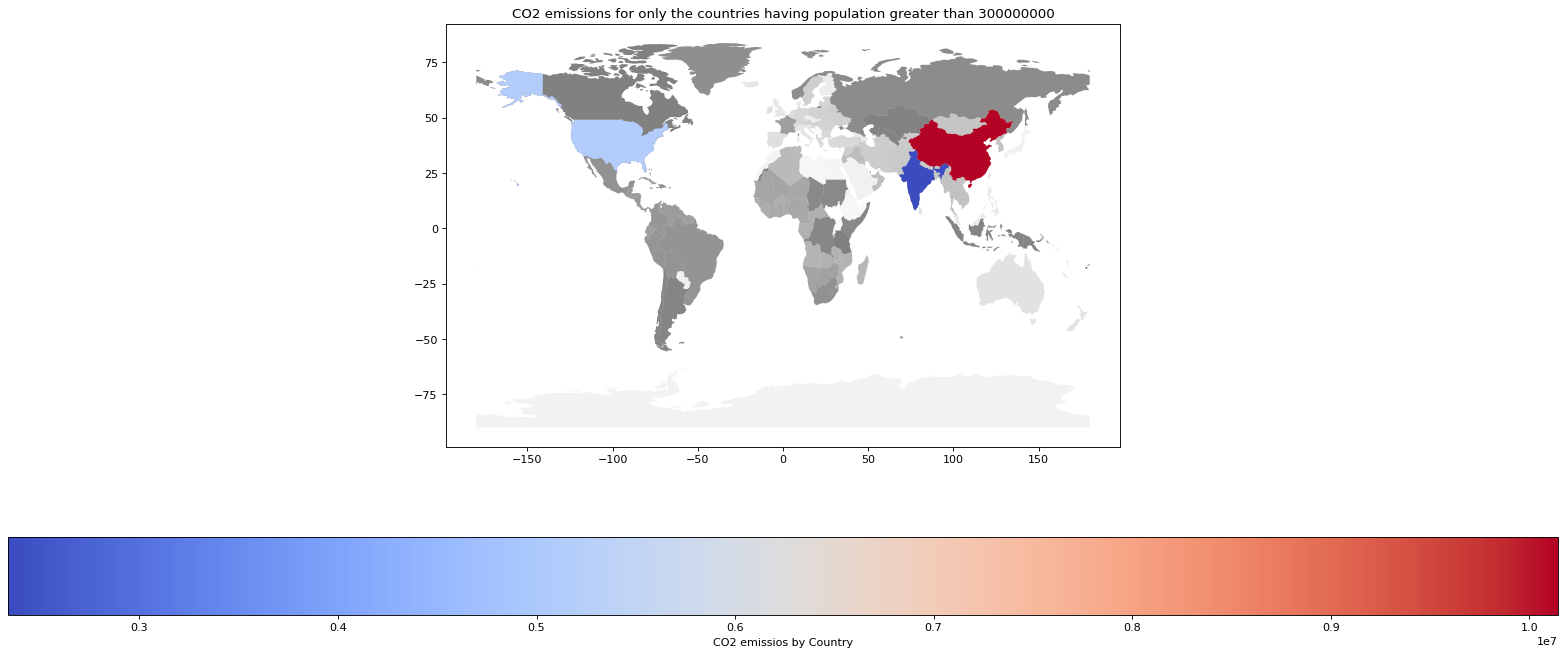

In [176]:
pop_value = 300000000
df_mergedOne = df_merged[df_merged["2015_y"]>pop_value]
fig, ax = plt.subplots(1, 1, figsize=(25, 10), dpi=80) # setting the axis, figure size and dpi for the plot
# plotting the map
world.plot(ax=ax, cmap="gray", alpha=0.5)
df_mergedOne.plot(column="2015_x", ax=ax, legend=True, cmap='coolwarm', legend_kwds={'label': "CO2 emissios by Country", 'orientation': "horizontal"})
ax.title.set_text(f"CO2 emissions for only the countries having population greater than {pop_value}") # setting the title
df_mergedOne

Three main countries of China, US and India have population greater than the given value and they are spcified as per their global emmissions.

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> Question 2: For year 2015, plot the CO2 emissions for only the countries having population less than 70000000. Very briefly interpret the generated plot.
</div>

,Country Code,geometry,name,2015_x,2015_y
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2156.196,868627.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,12933.509,51482633.0
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,549430.277,35702908.0
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,242091.673,17542806.0
5,UZB,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,102929.023,31298900.0
...,...,...,...,...,...
162,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",Macedonia,7099.312,2079328.0
163,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,43919.659,7095383.0
164,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,2240.537,622159.0
165,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,46255.538,1370328.0


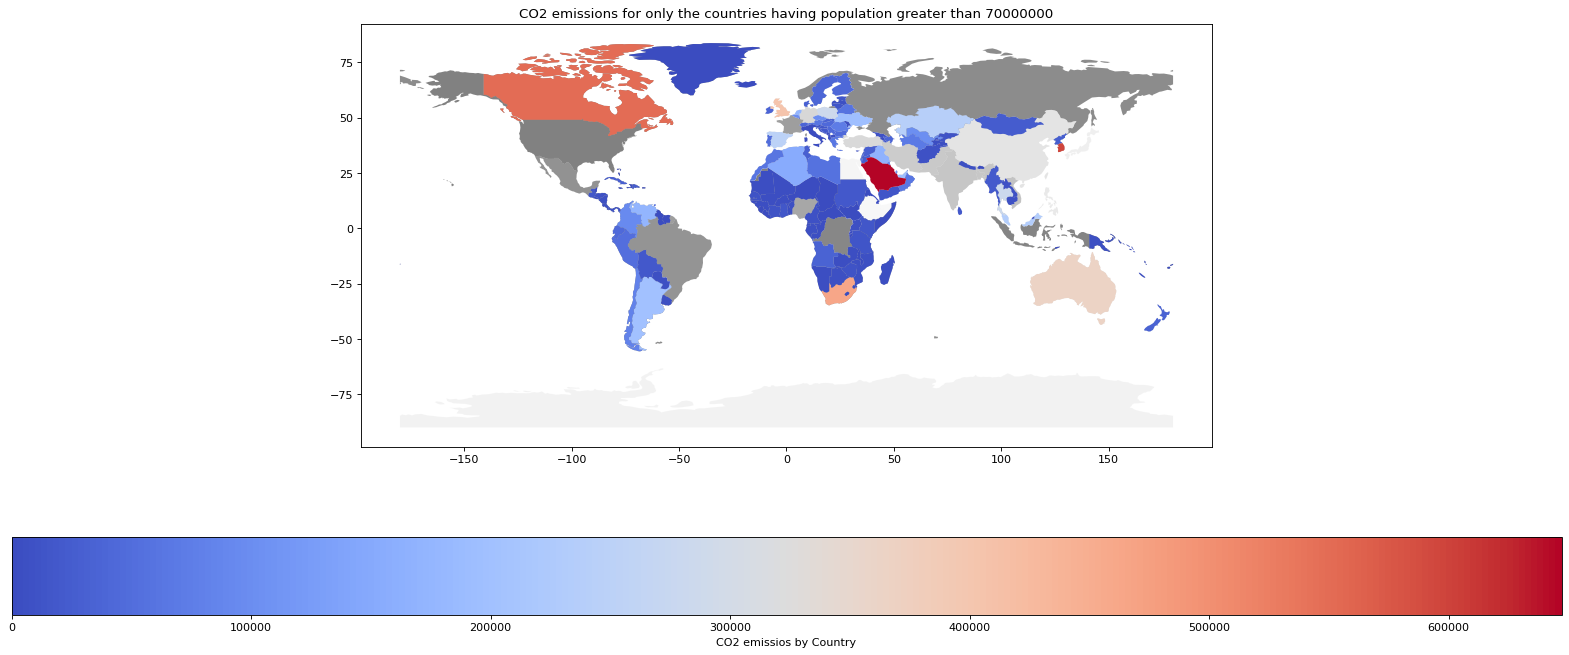

In [177]:
pop_value = 70000000
df_mergedOne = df_merged[df_merged["2015_y"]<pop_value]
fig, ax = plt.subplots(1, 1, figsize=(25, 10), dpi=80) # setting the axis, figure size and dpi for the plot
# plotting the map
world.plot(ax=ax, cmap="gray", alpha=0.5)
df_mergedOne.plot(column="2015_x", ax=ax, legend=True, cmap='coolwarm', legend_kwds={'label': "CO2 emissios by Country", 'orientation': "horizontal"})
ax.title.set_text(f"CO2 emissions for only the countries having population greater than {pop_value}") # setting the title
df_mergedOne

All the countries except China, India, US, Indonesia, Pakistan, Brazil, Nigeria, Bangladesh, Russia, Mexico, Japan, Ethiopia, Philippines, Egypt, Vietnam, DR Congo, Germany, Turkey and Iran which have their population below the given value have been plot on the map with their global emmissions.

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> Question 3: For year 2015, plot the CO2 emissions for only the countries having net CO2 emissions between 1600000 kt and 2400000 kt. Very briefly interpret the generated plot.
</div>

,Country Code,geometry,name,2015_x,2015_y
17,RUS,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ...",Russia,1698213.369,1.440969e+08
93,IND,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",India,2337749.170,1.310152e+09


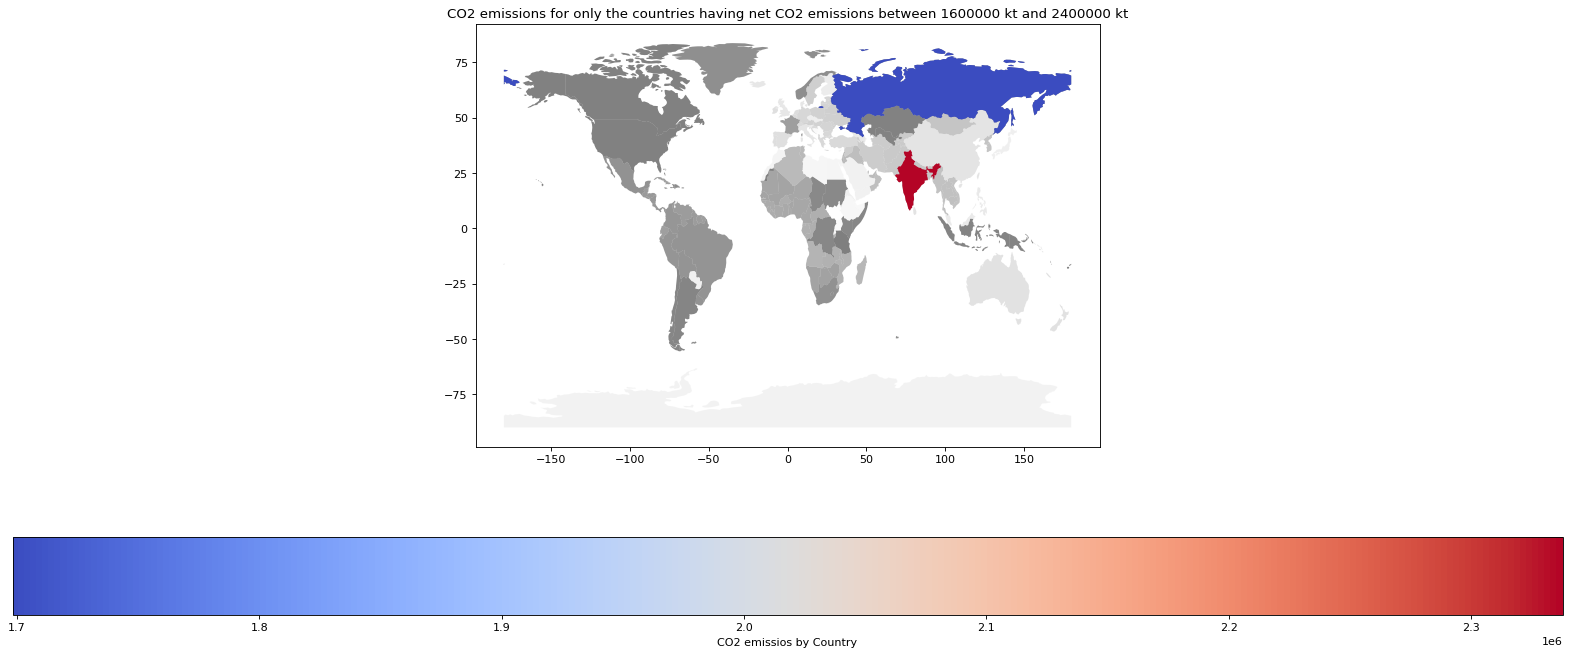

In [178]:
df_mergedOne = df_merged[(1600000<=df_merged["2015_x"]) & (df_merged["2015_x"]<=2400000)]
fig, ax = plt.subplots(1, 1, figsize=(25, 10), dpi=80) # setting the axis, figure size and dpi for the plot
# plotting the map
world.plot(ax=ax, cmap="gray", alpha=0.5)
df_mergedOne.plot(column="2015_x", ax=ax, legend=True, cmap='coolwarm', legend_kwds={'label': "CO2 emissios by Country", 'orientation': "horizontal"})
ax.title.set_text(f"CO2 emissions for only the countries having net CO2 emissions between 1600000 kt and 2400000 kt") # setting the title
df_mergedOne

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> Question 4: Plot the percentage change in the CO2 emissions from 1995 to 2015, for the country having the highest population in 2015. In this question, you have to consider the CO2 emissions for each year between: 1995 and 2015. 
</div>

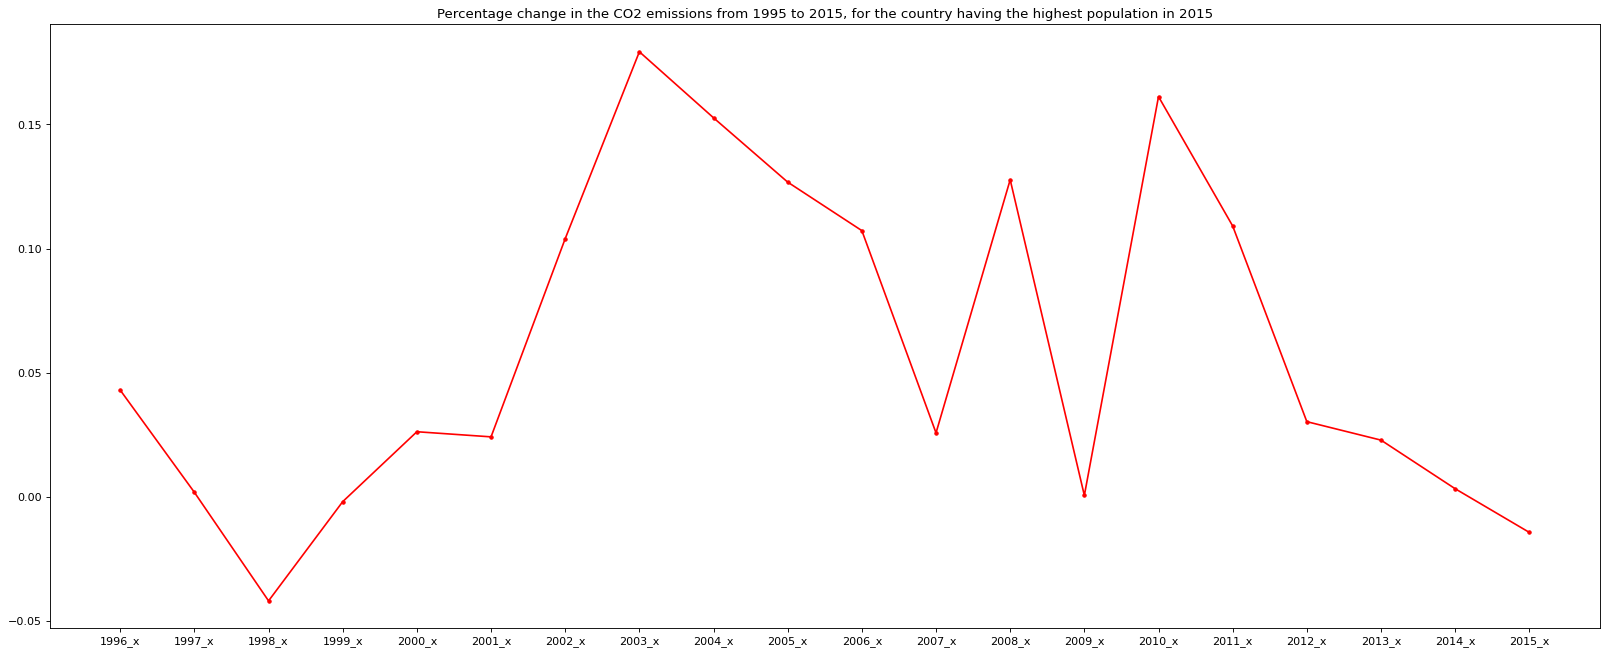

In [208]:
df_master # note x is the emission and y is the population
df_masterOne = df_master.iloc[df_master["2015_y"].idxmax()] # finding the country having the highest population in 2015 
df_masterOne = df_masterOne.filter(regex="\d+_x") # filtering the co2 emmisions column
data = df_masterOne.pct_change() # finding the percent change among them, considering each year from 119 to 2005
fig, ax = plt.subplots(1, 1, figsize=(25, 10), dpi=80) # setting the axis, figure size and dpi for the plot
ax.plot(data, marker=".", color="r") # plotting the percentage change
ax.title.set_text(f"Percentage change in the CO2 emissions from 1995 to 2015, for the country having the highest population in 2015") # setting the title

As we can see the percentage change in CO2 from 1995 to 2015 for the country with highest population was China and it has seen a rise and fall in CO2 emissions as seen from the graph.

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> Question 5: Present a scatter plot between mean population of each country and their mean CO2 emission considering from year 2000 until 2015. Very briefly interpret the generated plot, particularly look for any correlation (if present) among the plotted variables. In this question, you should consider each year between 2000 and 2015 to find the mean population and mean CO2 emissions. 
</div>

In [234]:
df_masterCo2 = df_master[['2000_x', '2001_x', '2002_x', '2003_x', '2004_x',
       '2005_x', '2006_x', '2007_x', '2008_x', '2009_x', '2010_x', '2011_x',
       '2012_x', '2013_x', '2014_x', '2015_x']]

df_masterPop = df_master[['2000_y', '2001_y', '2002_y', '2003_y', '2004_y',
       '2005_y', '2006_y', '2007_y', '2008_y', '2009_y', '2010_y', '2011_y',
       '2012_y', '2013_y', '2014_y', '2015_y']]
df_masterOne = df_master
df_masterOne["meanCO2"] = df_masterCo2.mean(axis=1)
df_masterOne["meanPop"] = df_masterPop.mean(axis=1)

In [235]:
fig = px.scatter(df_masterOne, x="meanCO2", y="meanPop", hover_data=['name'])
fig.show()

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> Upon completion of the above exercise, you should now be able to complete the Task 1.2 of the assignment. The data to be used in the assessment is also adopted from the same source, the World Bank. Please note that you must attempt the assignment independently. The ideas discussed during this workhsop session can be used to find the solution to the Task 1.2 but you must describe the steps in your own words without indulging in any forms of Academic Unfair Practice.
</div>

# Workshop deliverable

You are required to submit a copy of this solved Jupyter notebook through the Workshop 7 Submission Point on the Moodle. Please note that your submission should only contain the workshop task and you must NOT submit any actual task of the assessment at this stage.